In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [5]:
model = Sequential()

model.add(Conv2D(64, (5, 5),
                    padding="same",
                    activation="relu",
                    input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/8
430/430 [==============================] - 597s 1s/step - loss: 0.5437 - accuracy: 0.8066 - val_loss: 0.3615 - val_accuracy: 0.8692
Epoch 2/8
430/430 [==============================] - 585s 1s/step - loss: 0.3071 - accuracy: 0.8892 - val_loss: 0.2846 - val_accuracy: 0.8984
Epoch 3/8
430/430 [==============================] - 563s 1s/step - loss: 0.2601 - accuracy: 0.9051 - val_loss: 0.2369 - val_accuracy: 0.9120
Epoch 4/8
430/430 [==============================] - 559s 1s/step - loss: 0.2203 - accuracy: 0.9200 - val_loss: 0.2429 - val_accuracy: 0.9132
Epoch 5/8
430/430 [==============================] - 573s 1s/step - loss: 0.1957 - accuracy: 0.9290 - val_loss: 0.2243 - val_accuracy: 0.9152
Epoch 6/8
430/430 [==============================] - 571s 1s/step - loss: 0.1719 - accuracy: 0.9368 - val_loss: 0.2180 - val_accuracy: 0.9212
Epoch 7/8
430/430 [==============================] - 572s 1s/step - loss: 0.1530 - accuracy: 0.9448 - val_loss: 0.2065 - val_accuracy: 0.9280
Epoch 

In [9]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 30s 92ms/step - loss: 32.9953 - accuracy: 0.8929
[32.99532699584961, 0.8928999900817871]


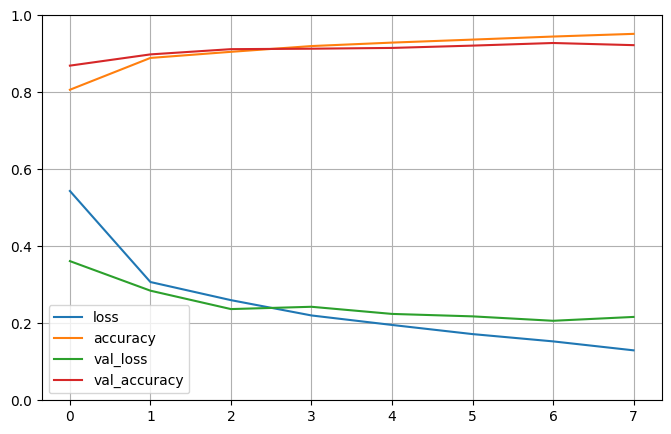

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 28s 89ms/step


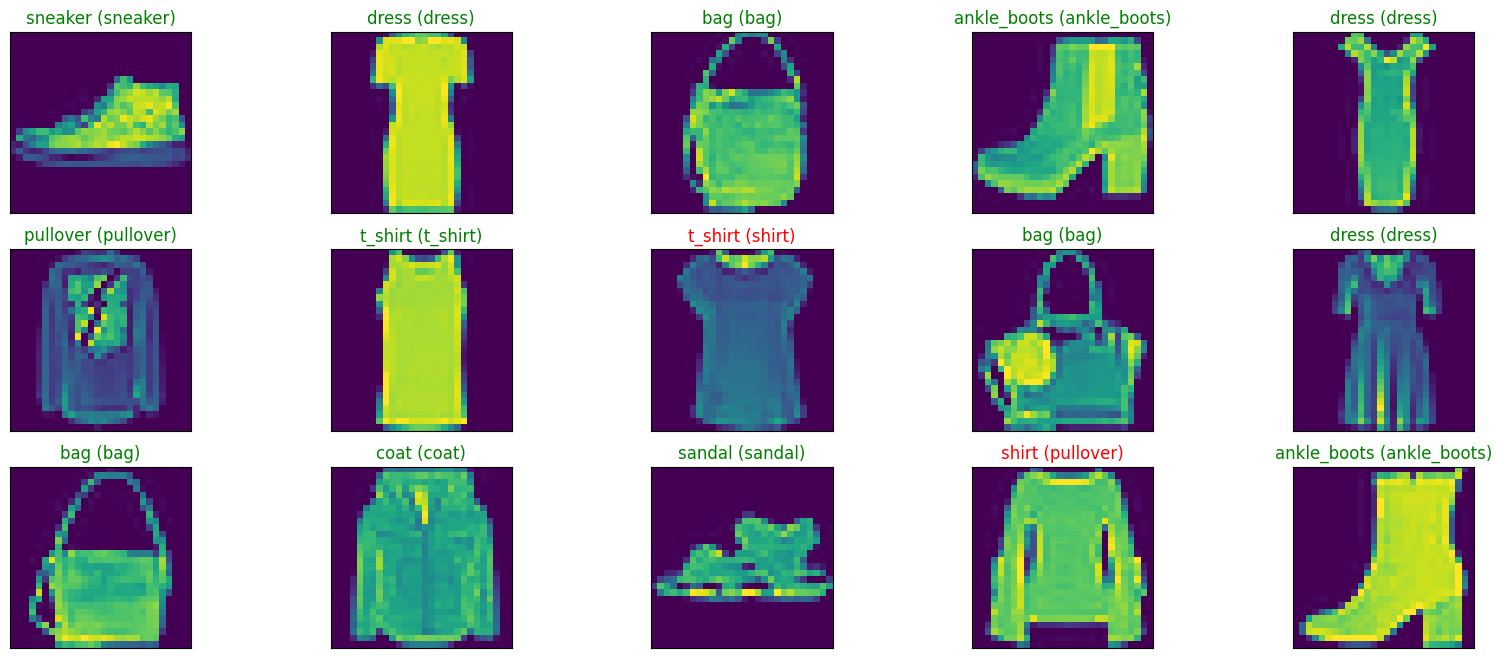

In [14]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]

    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))